## Import Libraries

In [252]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Set default matplot figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## Reading Data Set using Pandas

In [135]:
titanic_df = pd.read_csv('train.csv')

## Analysis

In [136]:
# Check the first 5 rows of the data frame
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [137]:
# Column names
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [138]:
# Information about the data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 73.1+ KB


In [143]:
# Number of passengers in each class
titanic_df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

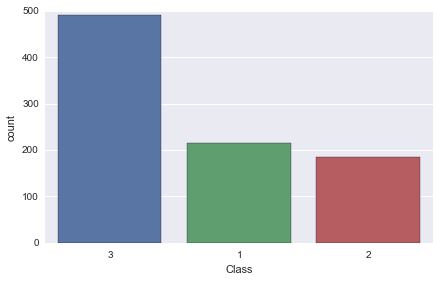

In [205]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.factorplot('Pclass', data=titanic_df, kind='count', aspect=1.5)
fg.set_xlabels('Class')

In [29]:
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

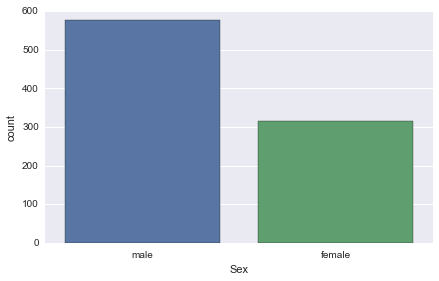

In [199]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.factorplot('Sex', data=titanic_df, kind='count', aspect=1.5)

There are almost two times males as much as there were females. 

In [34]:
# Number of men and women in each of the passenger class
titanic_df.groupby(['Sex', 'Pclass'])['Sex'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

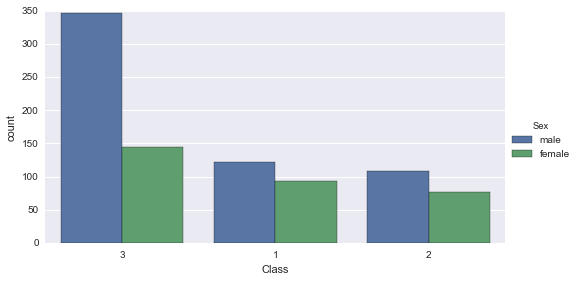

In [207]:
# Again use saeborn to group by Sex and class
g = sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count', aspect=1.75)
g.set_xlabels('Class')

As shown in the figure above, there are more than two times males than females in class 3. However, in classes 1
and 2, the ratio of male to female is almost 1.

In [79]:
# Number of passengers who survived in each class grouped by sex. Also total was found for each class grouped by sex.
titanic_df.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=np.sum, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


In [65]:
not_survived = titanic_df[titanic_df['Survived']==0]

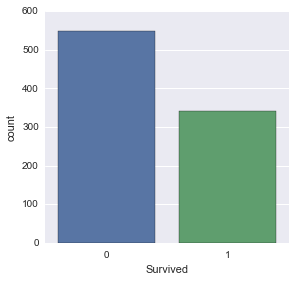

In [357]:
# Factor plot of those who survived vs. who didn't
sns.factorplot('Survived', data=titanic_df, kind='count')

In [68]:
# Total number of passengers who didn't survive 
len(not_survived)

549

In [76]:
# Number of passengers who did not survive in each class grouped by sex.
not_survived.pivot_table('Survived', 'Sex', 'Pclass', aggfunc=len, margins=True)

Pclass,1,2,3,All
Sex,,,,
female,3,6,72,81
male,77,91,300,468
All,80,97,372,549


In [215]:
# Passengers who survived and who didn't survive grouped by class and sex
table = pd.crosstab(index=[titanic_df.Survived,titanic_df.Pclass], columns=[titanic_df.Sex,titanic_df.Embarked])

In [111]:
table.unstack()

Sex      female                              male                           \
Embarked      C         Q          S            C         Q          S       
Pclass        1  2   3  1  2   3   1   2   3    1  2   3  1  2   3   1   2   
Survived                                                                     
0             1  0   8  0  0   9   2   6  55   25  8  33  1  1  36  51  82   
1            42  7  15  1  2  24  46  61  33   17  2  10  0  0   3  28  15   

Sex            
Embarked       
Pclass      3  
Survived       
0         231  
1          34

In [225]:
table.columns, table.index

(MultiIndex(levels=[[u'Female', u'Male'], [u'Cherbourg', u'Queenstown', u'Southampton']],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=[u'Sex', u'Embarked']),
 MultiIndex(levels=[[0, 1], [1, 2, 3]],
            labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
            names=[u'Survived', u'Pclass']))

In [224]:
# Change name of columns
table.columns.set_levels(['Female', 'Male'], level=0, inplace=True)
table.columns.set_levels(['Cherbourg','Queenstown','Southampton'], level=1, inplace=True)
table

Sex                Female                             Male             \
Embarked        Cherbourg Queenstown Southampton Cherbourg Queenstown   
Survived Pclass                                                         
0        1              1          0           2        25          1   
         2              0          0           6         8          1   
         3              8          9          55        33         36   
1        1             42          1          46        17          0   
         2              7          2          61         2          0   
         3             15         24          33        10          3   

Sex                          
Embarked        Southampton  
Survived Pclass              
0        1               51  
         2               82  
         3              231  
1        1               28  
         2               15  
         3               34

In [241]:
print('Average and median age of passengers are %0.f and %0.f years old, respectively'%(titanic_df.Age.mean(), 
                                                                          titanic_df.Age.median()))

Average and median age of passengers are 30 and 28 years old, respectively


In [246]:
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [314]:
# Drop missing values for the records in which age passenger is missing
age = titanic_df['Age'].dropna()

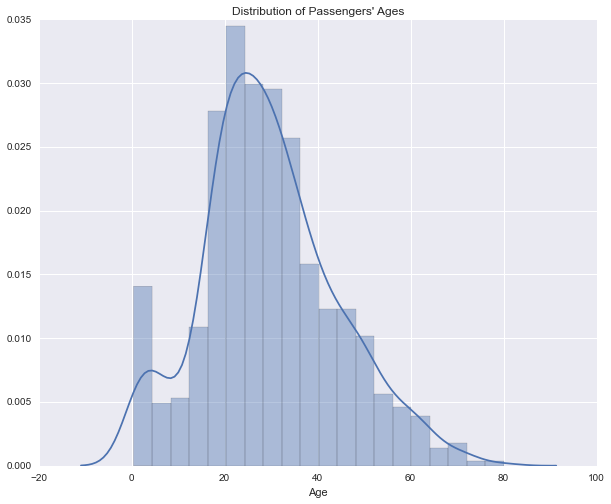

In [347]:
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

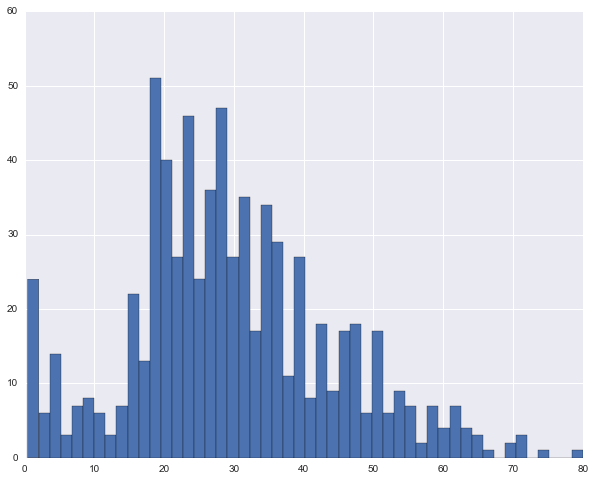

In [348]:
# Another way to plot a histogram of ages is shown below
titanic_df['Age'].hist(bins=50)

In [327]:
titanic_df['Parch'].dtype, titanic_df['SibSp'].dtype, len(titanic_df.Cabin.dropna())

(dtype('int64'), dtype('int64'), 204)

In [331]:
# Create a function to define those who are children (less than 16)
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [332]:
titanic_df['person'] = titanic_df[['Age', 'Sex']].apply(male_female_child, axis=1)

In [338]:
# Lets have a look at the first 10 rows of the data frame
titanic_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


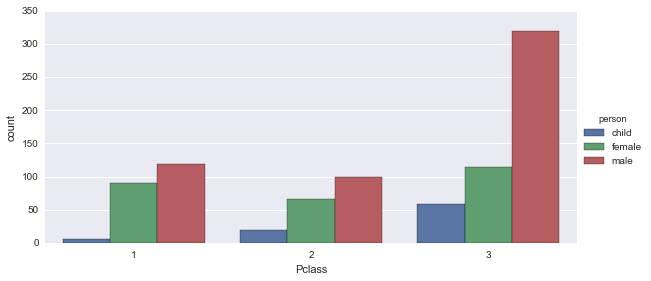

In [454]:
# Lets do a factorplot of passengers splitted into sex, children and class
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=2)

In [354]:
# Count number of men, women and children
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

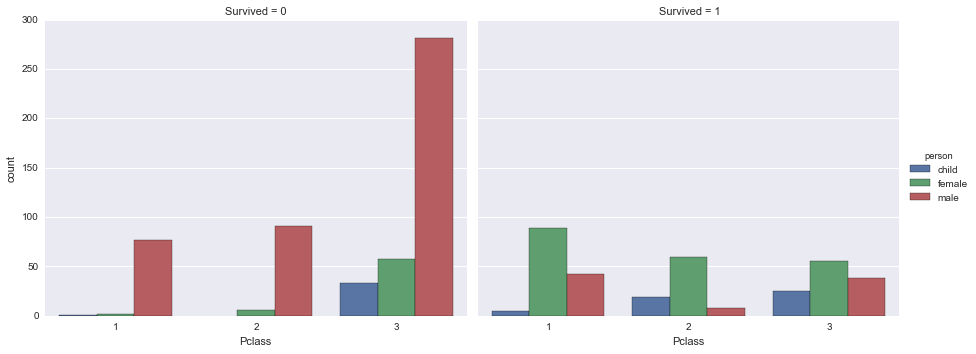

In [353]:
# Do the same as above, but split the passengers into either survived or not
sns.factorplot('Pclass', data=titanic_df, kind='count', hue='person', col='Survived', order=[1,2,3], 
               hue_order=['child','female','male'], aspect=1.25, size=5)

There are much more children in third class than there are in first and second class. However, one may expect that
there woould be more children in 1st and 2nd class than there are in 3rd class.

### kde plot, Distribution of Passengers' Ages

#### Grouped by Gender

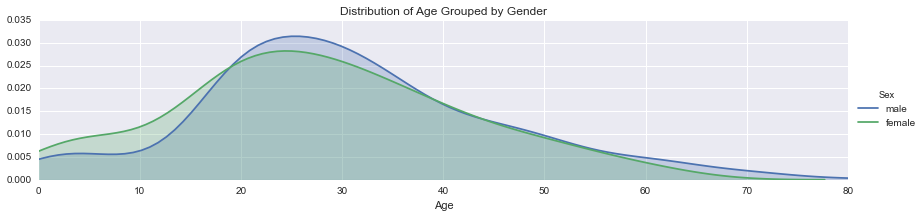

In [364]:
fig = sns.FacetGrid(titanic_df, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

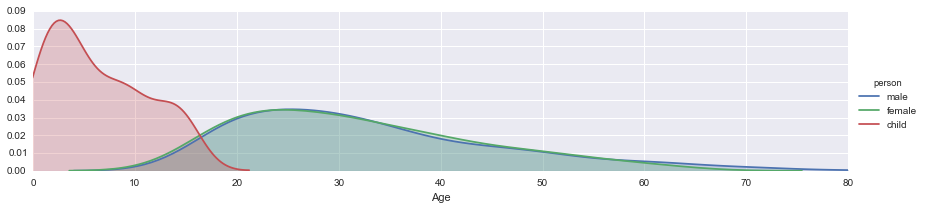

In [366]:
fig = sns.FacetGrid(titanic_df, hue='person', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#### Grouped by Class

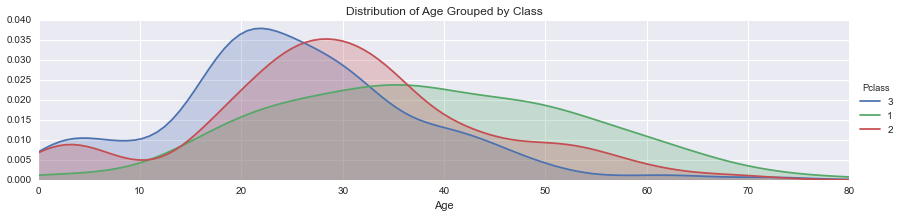

In [367]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

From the plot above, class 1 has a normal distribution. However, classes 2 and 3 have a skewed distribution towards
20 and 30-year old passengers.

#### What cabins did the Passengers stay in?

In [384]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [388]:
# Grab the first letter of the cabin letter
d = []
for c in deck:
    d.append(c[0])

In [390]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [398]:
from collections import Counter
Counter(d)

Counter({'C': 59, 'B': 47, 'D': 33, 'E': 32, 'A': 15, 'F': 13, 'G': 4, 'T': 1})

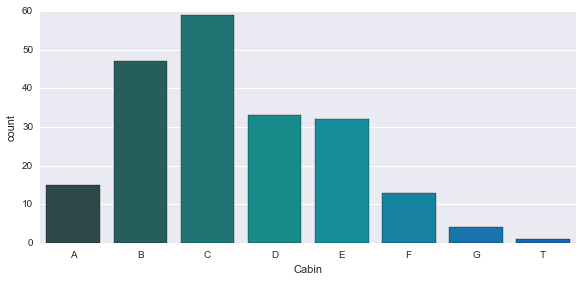

In [410]:
# Now lets factorplot the cabins. First transfer the d list into a data frame. Then rename the column Cabin 
cabin_df = DataFrame(d)
cabin_df.columns=['Cabin']
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G','T'], aspect=2, 
              palette='winter_d')

In [411]:
# Drop the 'T' cabin
cabin_df = cabin_df[cabin_df['Cabin'] != 'T']

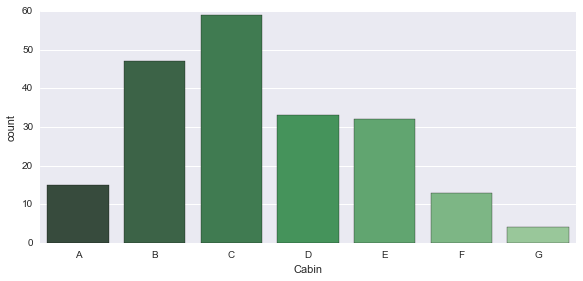

In [433]:
# Then replot the Cabins factorplot as above
sns.factorplot('Cabin', data=cabin_df, kind='count', order=['A','B','C','D','E','F','G'], aspect=2, 
              palette='Greens_d')

In [434]:
# Below is a link to the list of matplotlib colormaps
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)

True

#### Where did the passengers come from i.e. Where did the passengers land into the ship from?

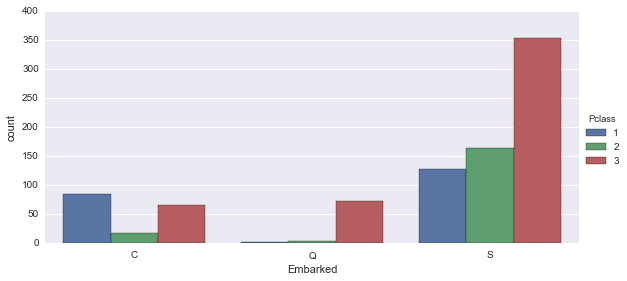

In [476]:
sns.factorplot('Embarked', data=titanic_df, kind='count', hue='Pclass', hue_order=range(1,4), aspect=2,
              order = ['C','Q','S'])

From the figure above, one may conclude that almost all of the passengers who boarded from Queenstown were in third 
class. On the other hand, many who boarded from Cherbourg were in first class. The biggest portion of passengers 
who boarded the ship came from Southampton, in which 353 passengers were in third class, 164 in second class and 
127 passengers were in first class. In such cases, one may need to look at the economic situation at these different towns at that period of time to understand why most passengers who boarded from Queenstown were in third class for example.

In [453]:
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
dtype: int64

In [470]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
port = pd.crosstab(index=[titanic_df.Pclass], columns=[titanic_df.Embarked])
port.columns = [['Cherbourg','Queenstown','Southampton']]

In [466]:
port

,Cherbourg,Queenstown,Southampton
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [471]:
port.index

Int64Index([1, 2, 3], dtype='int64', name=u'Pclass')

In [472]:
port.columns

Index([u'Cherbourg', u'Queenstown', u'Southampton'], dtype='object')

In [473]:
port.index=[['First','Second','Third']]

In [474]:
port

,Cherbourg,Queenstown,Southampton
First,85,2,127
Second,17,3,164
Third,66,72,353


#### Who was alone and who was with parents or siblings?

In [481]:
titanic_df[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [552]:
# Alone dataframe i.e. the passenger has no siblings or parents
alone_df = titanic_df[(titanic_df['SibSp'] == 0) & (titanic_df['Parch']==0)]
# Add Alone column
alone_df['Alone'] = 'Alone'
# Not alone data frame i.e. the passenger has either a sibling or a parent.
not_alone_df = titanic_df[(titanic_df['SibSp'] != 0) | (titanic_df['Parch']!=0)]
not_alone_df['Alone'] = 'With family'

# Merge the above dataframes
comb = [alone_df, not_alone_df]
# Merge and sort by index
titanic_df = pd.concat(comb).sort_index()

/home/tarek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/tarek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [519]:
[len(alone_df), len(not_alone_df)]

[537, 354]

In [520]:
# Show the first five records of the alone data frame
alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,Alone


In [521]:
# Show the first five rows of the not alone data frame
not_alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child,With family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female,With family


In [553]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone


In [539]:
""" Another way to perform the above
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'"""

" Another way to perform the above\ntitanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch\n\ntitanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With family'\ntitanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'"

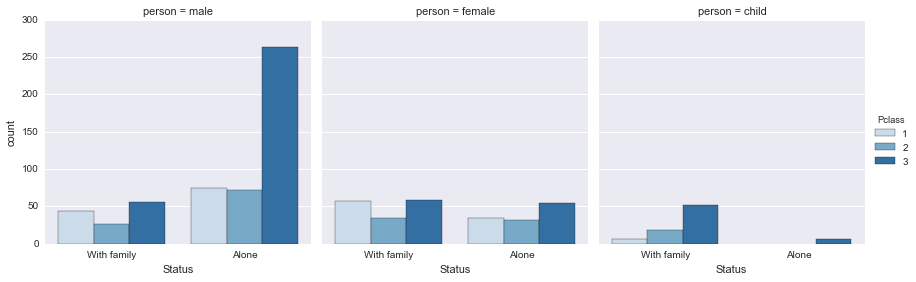

In [551]:
fg=sns.factorplot('Alone', data=titanic_df, kind='count', hue='Pclass', col='person', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

From the figure above, it is clear that most children traveled with family in third class. For men, most traveled alone in third class. On the other hand, the number of female passengers who traveled either with family or alone among the second and third class is comparable. However, more women traveled with family than alone in first class. 

### Factors Affecting the Surviving

In [554]:
'''Now lets look at the factors that help someone survived the sinking. We start this analysis by adding a new
cloumn to the titanic data frame. Use the Survived column to map to the new column with factors 0:no and 1:yes
using the map method'''
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no', 1:'yes'})

In [555]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male,Alone,no


#### Class Factor

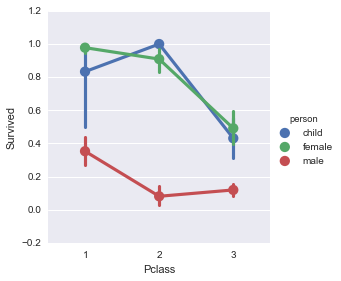

In [570]:
# Survived vs. class Grouped by gender
sns.factorplot('Pclass','Survived', hue='person', data=titanic_df, order=range(1,4), 
               hue_order = ['child','female','male'])

From the figure above, being a male or a third class reduce the chance for one to survive. 

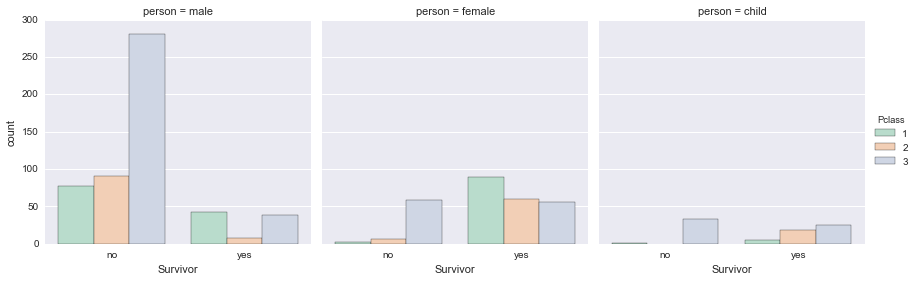

In [566]:
sns.factorplot('Survivor', data=titanic_df, hue='Pclass', kind='count', palette='Pastel2', hue_order=range(1,4),
              col='person')

### Age Factor

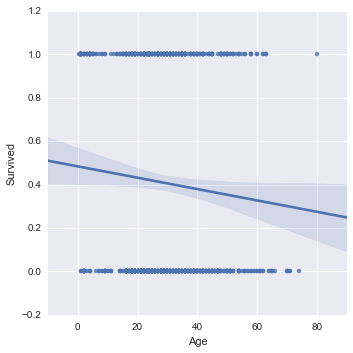

In [571]:
# Linear plot of age vs. survived
sns.lmplot('Age', 'Survived', data=titanic_df)

There seems to be a general linear trend between age and the survived field. The plot shows that the older the passenger is, the less chance he/she would survive.

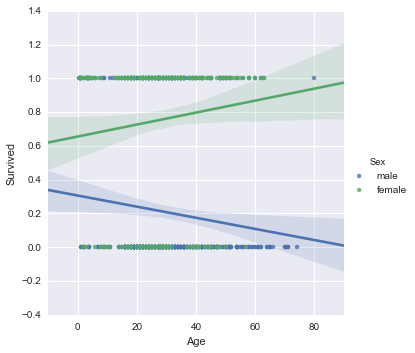

In [573]:
# Survived vs. Age grouped by Sex
sns.lmplot('Age', 'Survived', data=titanic_df, hue='Sex')

Older women have higher rate of survival than older men as shown in the figure above. Also, older women has higher
rate of srvival than younger women; an opposite trend to the one for the male passengers.

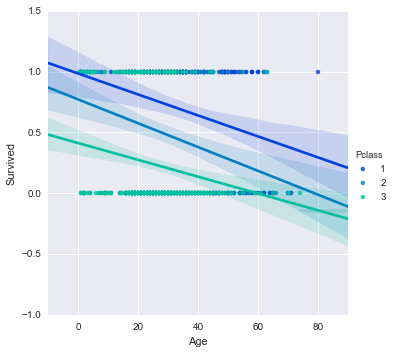

In [576]:
# Survived vs. Age gruped by class
sns.lmplot('Age', 'Survived', hue='Pclass', data=titanic_df, palette='winter', hue_order=range(1,4))

In all three classes, the chance to survive reduced as the passengers got older.

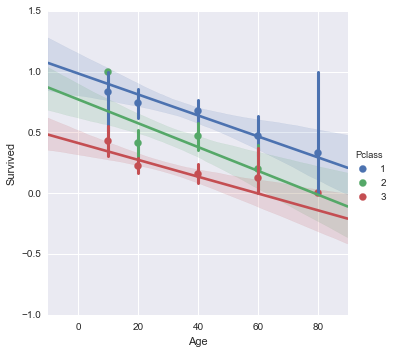

In [578]:
# Create a generation bin
generations = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations, hue_order=[1,2,3])

#### Deck Factor

In [580]:
titanic_df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked',
       u'person', u'Alone', u'Survivor'],
      dtype='object')

In [606]:
titanic_DF = titanic_df.dropna(subset=['Cabin'])

In [596]:
d[0:10]

['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D']

In [607]:
len(titanic_DF), len(d)

(204, 204)

In [608]:
titanic_DF['Deck'] = d

/home/tarek/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [613]:
titanic_DF = titanic_DF[titanic_DF.Deck != 'T']

In [614]:
titanic_DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female,With family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female,With family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,child,With family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,female,Alone,yes,C


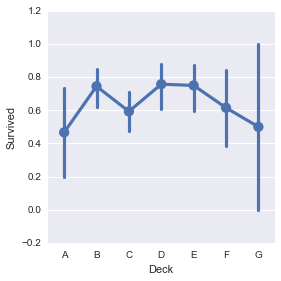

In [616]:
sns.factorplot('Deck', 'Survived', data=titanic_DF, order=['A','B','C','D','E','F','G'])

There does not seem to be any relation between deck and the survival rate as shown in the above figure!

#### Family Status Factor

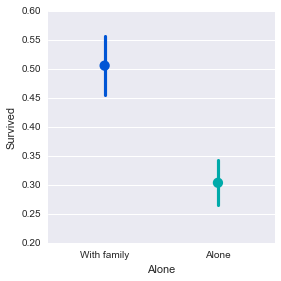

In [621]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter') #hue='person', 
               #hue_order=['child', 'female', 'male'])

There seems that the survival rate diminishes significantly for those who were alone. However, lets check if a
gender or age play a factor. From the figure below, one may conclude that the survival rate for women and children
are much higher than that of men, as was concluded previously and as anticipated. However, the survival rate is not
significant for either gender or for children who were with family versus who were alone. Moreover, the survival 
rate for women and children increases for those who were alone. For men, the survival rate diminishes slightly 
for those who were alone versus for those who were with family.

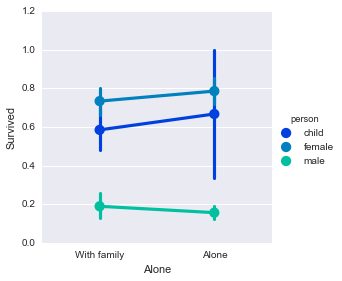

In [622]:
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='winter', hue='person', 
               hue_order=['child', 'female', 'male'])

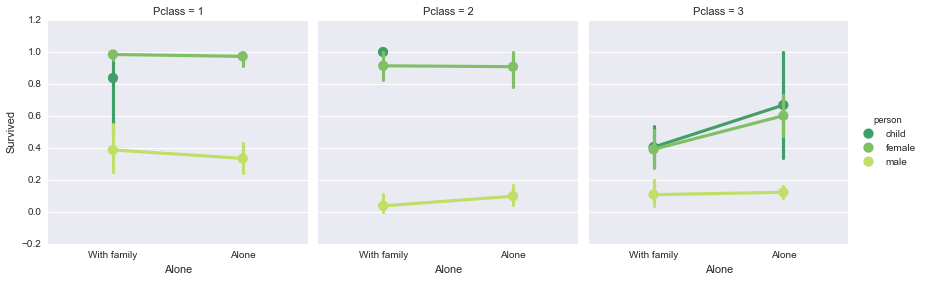

In [626]:
# Lets split it by class now!
sns.factorplot('Alone', 'Survived', data=titanic_df, palette='summer', hue='person', 
               hue_order=['child', 'female', 'male'], col='Pclass', col_order=[1,2,3])

### Predictive Modeling

In [627]:
import sklearn